In [12]:
import pandas as pd
import matplotlib.pyplot as plt

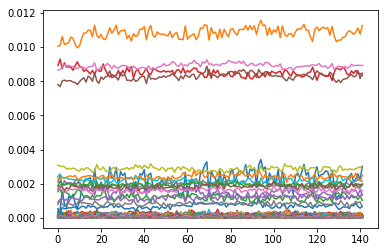

In [61]:
df = pd.read_csv("./x4dyl/1.csv") # shape = duration(millisecond?) x readings
shape = df.shape # (row,col)
tmp = [ _ for _ in range(138)]
ii = df.iloc[:, 0:138]
ii.columns = tmp
qq = df.iloc[:, 138:shape[1]-1 ]
qq.columns = tmp
iq = ii.add(qq, fill_value=None) # fill_value defaults as None
iq = abs(iq)
# iq.plot(kind="hexbin", x=)
iq.plot(legend=None)
plt.show()
"""
>> ii = ans(:, 1:138);
>> qq = ans(:, 139:end-1);
>> iq = ii+j*qq;
>> imagesc(abs(iq))
>> plot(abs(iq(1,:)))
"""

In [10]:
df = pd.read_csv("./x4dyl/2.csv") # shape = duration(millisecond?) x readings
print(df)

     -0.022833  -0.006775  -0.005391  -0.010139  -0.009421  -0.002225  \
0    -0.022710  -0.006590  -0.005157  -0.010041  -0.009396  -0.002184   
1    -0.022774  -0.006609  -0.005223  -0.010072  -0.009402  -0.002162   
2    -0.023056  -0.006738  -0.005095  -0.009891  -0.009379  -0.002294   
3    -0.022654  -0.006570  -0.005202  -0.009885  -0.009232  -0.002111   
4    -0.022762  -0.006513  -0.005071  -0.010014  -0.009471  -0.002182   
..         ...        ...        ...        ...        ...        ...   
137  -0.021825  -0.006101  -0.005216  -0.009965  -0.009009  -0.001794   
138  -0.021788  -0.005986  -0.005029  -0.009941  -0.009069  -0.001850   
139  -0.021850  -0.006013  -0.005028  -0.009852  -0.009040  -0.001833   
140  -0.021817  -0.005893  -0.004939  -0.009793  -0.009034  -0.001819   
141  -0.021828  -0.006013  -0.005144  -0.010018  -0.009029  -0.001745   

     0.002992  0.001765  -0.001676  -0.002755  ...  0.000035  -0.000042.1  \
0    0.002987  0.001788  -0.001699  -0.002935 

In [11]:
df = pd.read_csv("./x4dyl/3.csv") # shape = duration(millisecond?) x readings
print(df)

     -0.022881  -0.006693  -0.005204  -0.009877  -0.009307  -0.002208  \
0    -0.023083  -0.006801  -0.005233  -0.009953  -0.009333  -0.002153   
1    -0.022547  -0.006459  -0.005116  -0.010049  -0.009365  -0.002131   
2    -0.022661  -0.006453  -0.005060  -0.009931  -0.009451  -0.002409   
3    -0.022355  -0.006293  -0.005115  -0.010011  -0.009376  -0.002078   
4    -0.022612  -0.006466  -0.005114  -0.010002  -0.009338  -0.002051   
..         ...        ...        ...        ...        ...        ...   
137  -0.021891  -0.006069  -0.005043  -0.009877  -0.009031  -0.001805   
138  -0.021937  -0.006065  -0.005169  -0.010050  -0.009183  -0.001973   
139  -0.021956  -0.006133  -0.005126  -0.009917  -0.009058  -0.001849   
140  -0.021911  -0.006003  -0.004924  -0.009764  -0.008944  -0.001740   
141  -0.021712  -0.005909  -0.005054  -0.009911  -0.008884  -0.001643   

     0.003015  0.001860  -0.001506  -0.002527  ...  0.000061.1  0.000071.1  \
0    0.003099  0.001948  -0.001458  -0.002627